In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf
from stationarity_test import check_for_stationarity
sb.set_theme()

# Single Observation

In [2]:
ticker = "SPY"
start = "2020-01-03"
end = "2020-03-03"
interval = "1d"

In [3]:
df = yf.download(ticker, start = start, end = end, interval = interval, multi_level_index = False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


p-value = 0.018302954659119585 | The series SPY is likely stationary


True

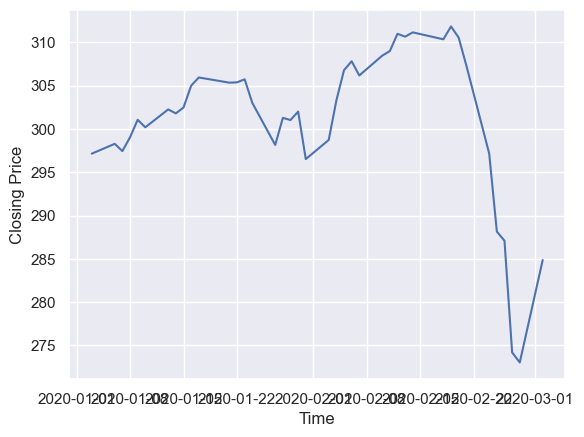

In [4]:
df_close = df['Close']
plt.plot(df_close)
plt.xlabel('Time')
plt.ylabel('Closing Price')
df_close.name = f'{ticker}'
check_for_stationarity(df_close)

p-value = 0.0023759614361526064 | The series SPY is likely stationary


True

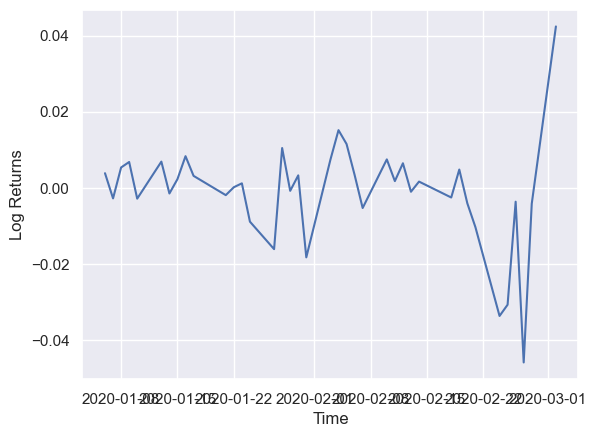

In [5]:
log_returns = np.log(df['Close']).diff().dropna()
plt.plot(log_returns)
plt.xlabel('Time')
plt.ylabel('Log Returns')
check_for_stationarity(log_returns)

# Cointegration Test

In [6]:
symbol_list = ['COP', 'ET']
prices = yf.download(symbol_list, start=start, end = end, interval = interval, multi_level_index = False)['Close']
x1price = prices[symbol_list[0]]
x2price = prices[symbol_list[1]]
x1 = np.log(x1price).diff().dropna()
x2 = np.log(x2price).diff().dropna()

[*********************100%***********************]  2 of 2 completed


Text(0, 0.5, 'Series Value')

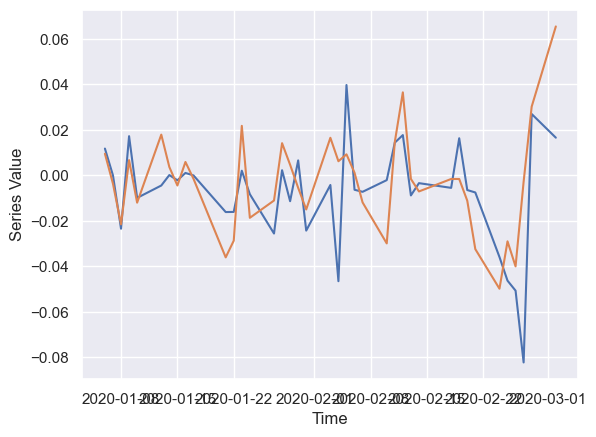

In [7]:
plt.plot(x1.index, x1.values)
plt.plot(x2.index, x2.values)
plt.xlabel('Time')
plt.ylabel('Series Value')

In [8]:
x1 = sm.add_constant(x1)
results = sm.OLS(x2, x1).fit()
x1 = x1[symbol_list[0]]
results.params

const    0.000951
COP      0.529578
dtype: float64

In [9]:
beta = results.params[symbol_list[0]]
z = x2 - beta * x1
z.name = f'Cointegration of {symbol_list[0]} and {symbol_list[1]}'

mean = z.mean()
std = z.std()

check_for_stationarity(z);
print(z)
print(f'mean: {mean}')

p-value = 0.0017416879004334886 | The series Cointegration of COP and ET is likely stationary
Date
2020-01-06    0.003298
2020-01-07   -0.003662
2020-01-08   -0.009094
2020-01-09   -0.002412
2020-01-10   -0.006750
2020-01-13    0.020277
2020-01-14    0.003613
2020-01-15   -0.003295
2020-01-16    0.005339
2020-01-17   -0.001474
2020-01-21   -0.027508
2020-01-22   -0.020191
2020-01-23    0.020699
2020-01-24   -0.014269
2020-01-27    0.002493
2020-01-28    0.012960
2020-01-29    0.010687
2020-01-30   -0.008953
2020-01-31   -0.002126
2020-02-03    0.018775
2020-02-04    0.030867
2020-02-05   -0.011771
2020-02-06    0.004525
2020-02-07   -0.008050
2020-02-10   -0.028804
2020-02-11    0.007026
2020-02-12    0.027125
2020-02-13    0.003101
2020-02-14   -0.005247
2020-02-18    0.001325
2020-02-19   -0.010226
2020-02-20   -0.007695
2020-02-21   -0.028445
2020-02-24   -0.030816
2020-02-25   -0.004477
2020-02-26   -0.013167
2020-02-27    0.040768
2020-02-28    0.015936
2020-03-02    0.056711
Name

# Oscilattor Generated

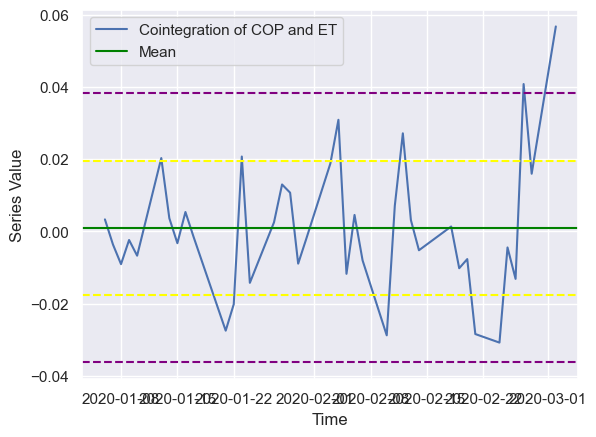

In [10]:
plt.plot(z.index, z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.axhline(mean, color ='green', label = 'Mean')
plt.axhline(mean + std, color ='yellow', linestyle = 'dashed', label = 'STD 1')
plt.axhline(mean - std, color ='yellow', linestyle = 'dashed', label = 'STD -1')
plt.axhline(mean + 2 * std, color ='purple', linestyle = 'dashed', label = 'STD 2')
plt.axhline(mean - 2 * std, color ='purple', linestyle = 'dashed', label = 'STD -2')
plt.legend([z.name, 'Mean'])